In [1]:
# Import the dependencies.
from pathlib import Path
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from pprint import pprint

# Create a reference to the file. 
database_path = Path("./Resources/coin_Bitcoin.sqlite")

In [2]:
# Create an engine that can talk to the database
engine = create_engine(f"sqlite:///{database_path}")
conn=engine.connect()

In [3]:

data = pd.read_sql("SELECT * FROM bit_coin", conn)
# Preview the Data
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.48800659179688,134.0,134.44400024414062,144.5399932861328,0.0,1.6037688645E9
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.92999267578125,134.0500030517578,144.0,139.0,0.0,1.542813125E9
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.88999938964844,107.72000122070312,139.0,116.98999786376953,0.0,1.29895459375E9
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.5999984741211,92.28189849853516,116.37999725341797,105.20999908447266,0.0,1.16851749525E9
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.12799835205078,79.0999984741211,106.25,97.75,0.0,1.08599516875E9


In [4]:
# Query All Records in the the Database

sql_statement = "SELECT * FROM bit_coin"
with engine.begin() as conn:
    response = conn.exec_driver_sql(sql_statement).all()
    pprint(response)

[('1', 'Bitcoin', 'BTC', '2013-04-29 23:59:59', '147.48800659179688', '134.0', '134.44400024414062', '144.5399932861328', '0.0', '1.6037688645E9'),
 ('2', 'Bitcoin', 'BTC', '2013-04-30 23:59:59', '146.92999267578125', '134.0500030517578', '144.0', '139.0', '0.0', '1.542813125E9'),
 ('3', 'Bitcoin', 'BTC', '2013-05-01 23:59:59', '139.88999938964844', '107.72000122070312', '139.0', '116.98999786376953', '0.0', '1.29895459375E9'),
 ('4', 'Bitcoin', 'BTC', '2013-05-02 23:59:59', '125.5999984741211', '92.28189849853516', '116.37999725341797', '105.20999908447266', '0.0', '1.16851749525E9'),
 ('5', 'Bitcoin', 'BTC', '2013-05-03 23:59:59', '108.12799835205078', '79.0999984741211', '106.25', '97.75', '0.0', '1.08599516875E9'),
 ('6', 'Bitcoin', 'BTC', '2013-05-04 23:59:59', '115.0', '92.5', '98.0999984741211', '112.5', '0.0', '1.2503165625E9'),
 ('7', 'Bitcoin', 'BTC', '2013-05-05 23:59:59', '118.80000305175781', '107.14299774169922', '112.9000015258789', '115.91000366210938', '0.0', '1.288693

In [12]:
import matplotlib.dates as mdates

def plots_for_crypto(input_file):
    df = pd.read_csv(input_file)
#     df['Date_No'] = df['Date'].apply(lambda x: mdates.date2num(x))
    df['Date'] = pd.to_datetime(df['Date'])
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title("Closing price distribution of Bitcoin", fontsize=15)
    plt.show()

    # Histogram for Bitcoin Closing Prices
    plt.figure(figsize=(10, 5))
    plt.hist(df['Close'], bins=30, edgecolor='k', color='green')
    plt.title('Histogram of Bitcoin Closing Prices')
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Market Capitalization Comparison (Bitcoin)
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Marketcap'], label='Bitcoin Market Cap', color='red', alpha=0.5)
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    plt.gcf().autofmt_xdate()
    plt.title('Bitcoin Market Capitalization Over Time')
    plt.xlabel('Date')
    plt.ylabel('Market Cap (USD)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

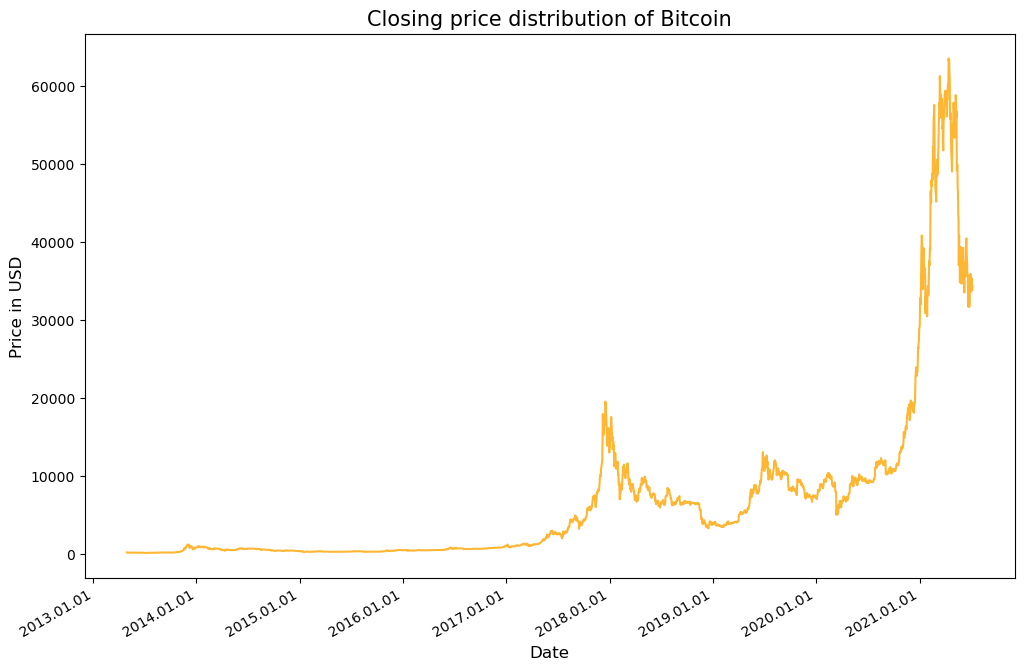

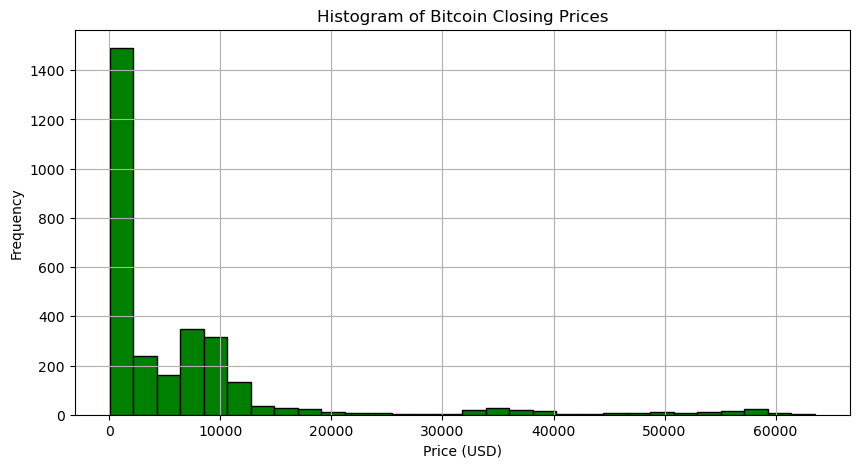

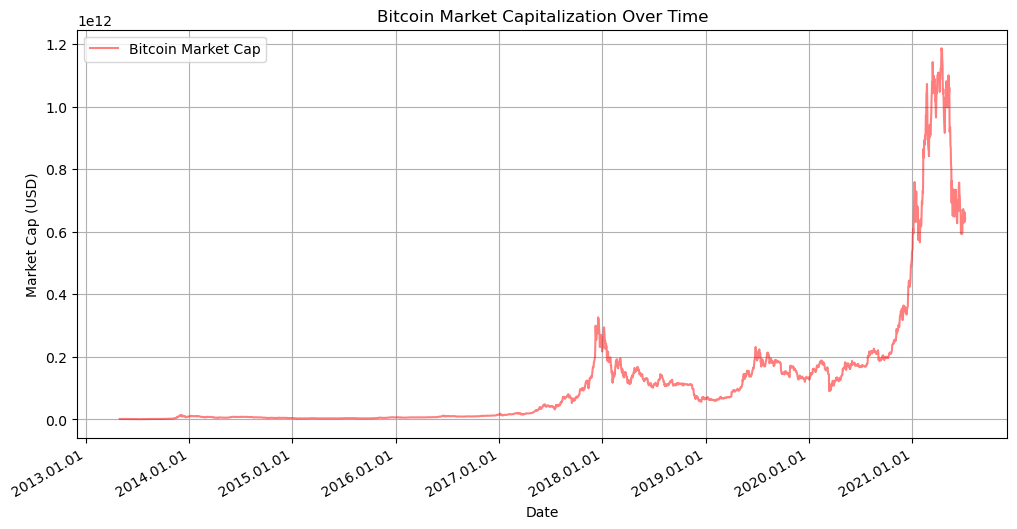

In [13]:
plots_for_crypto("./Resources/coin_Bitcoin.csv")

Looks like there seems to be a spike in early 2018 and then there is a huge raise 2022 from 10000 USD to more than 60000+ USD.

And most of the time the closing price is 1400+

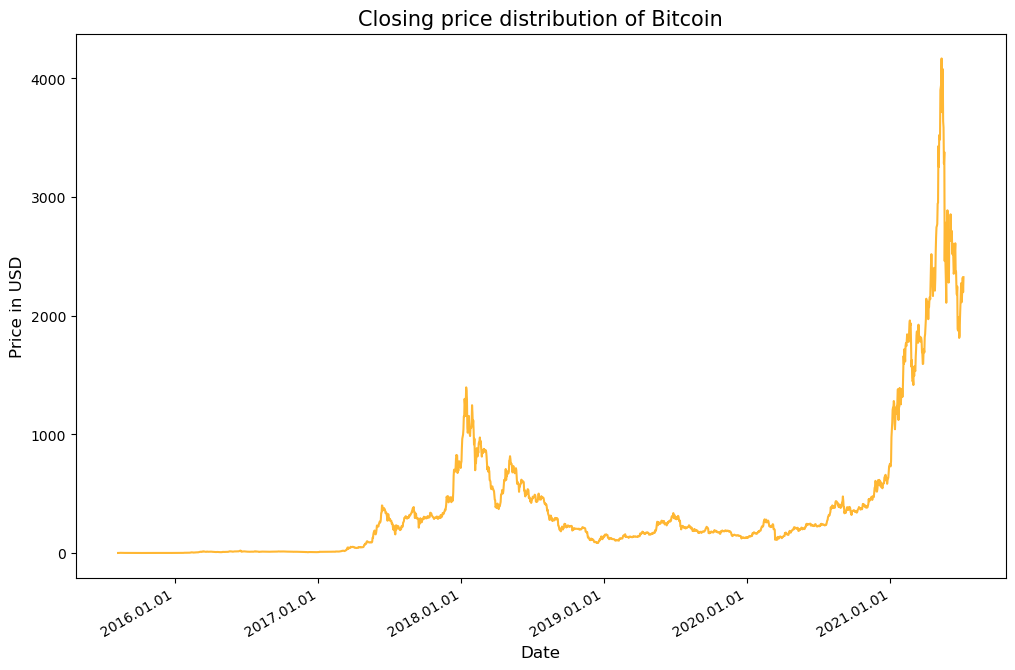

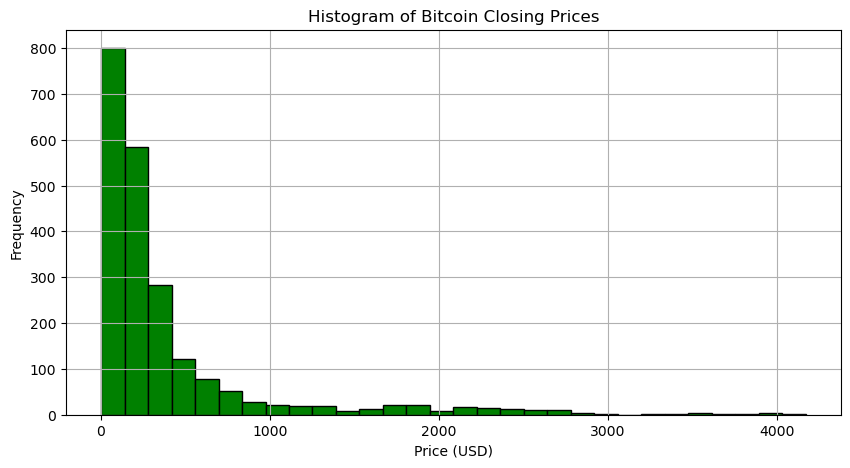

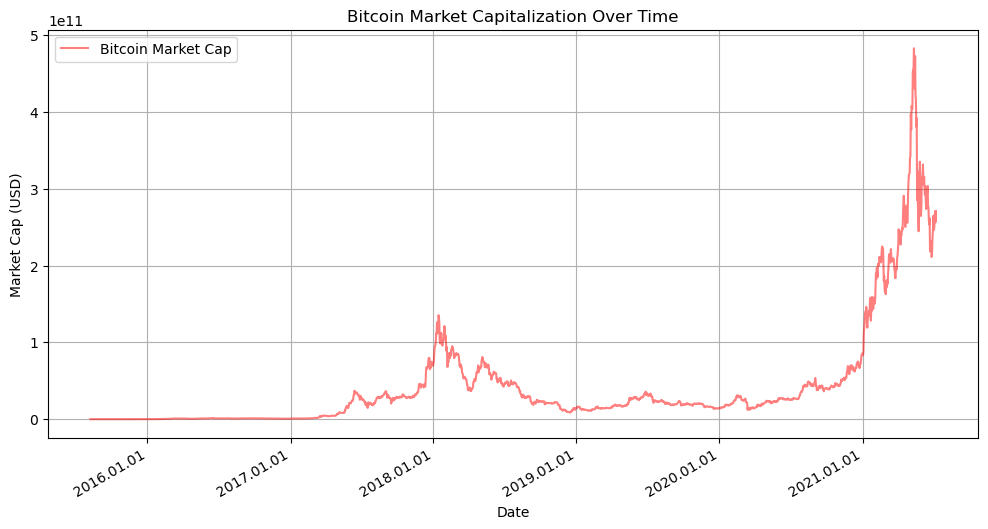

In [14]:
plots_for_crypto("./Resources/coin_Ethereum.csv")

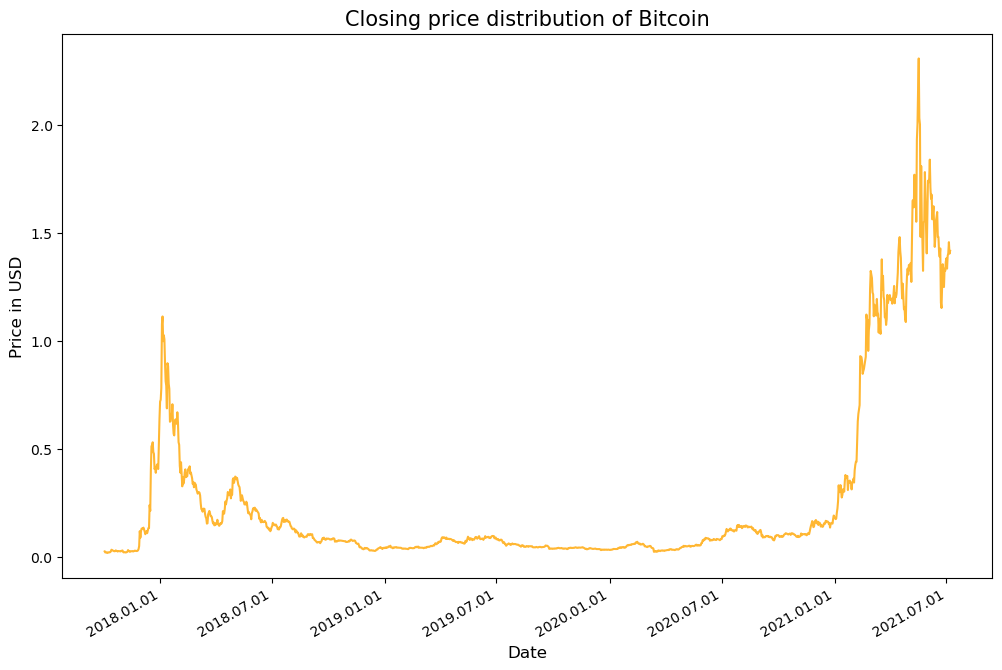

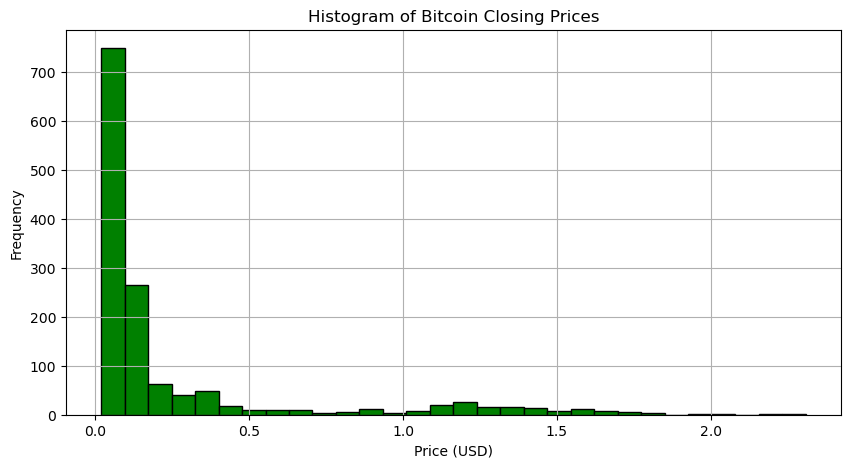

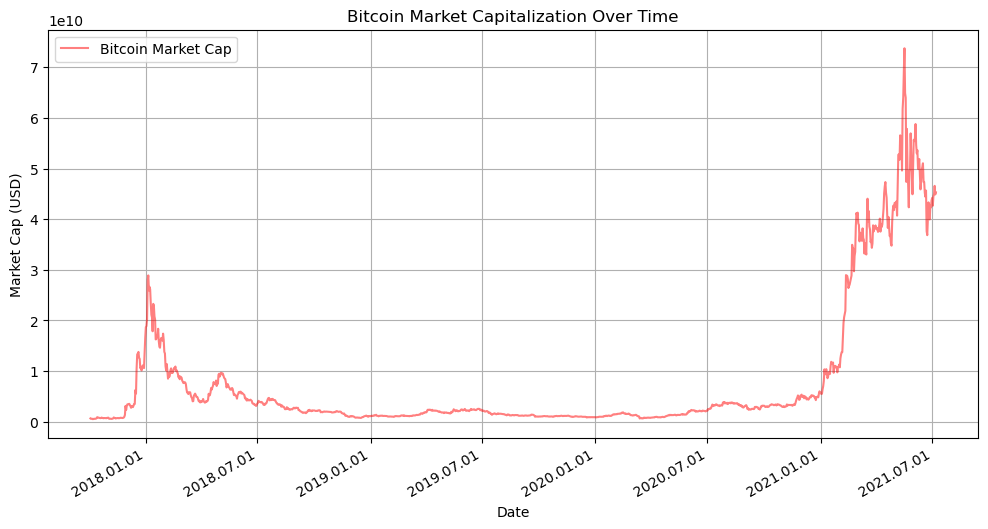

In [15]:
plots_for_crypto("./Resources/coin_Cardano.csv")

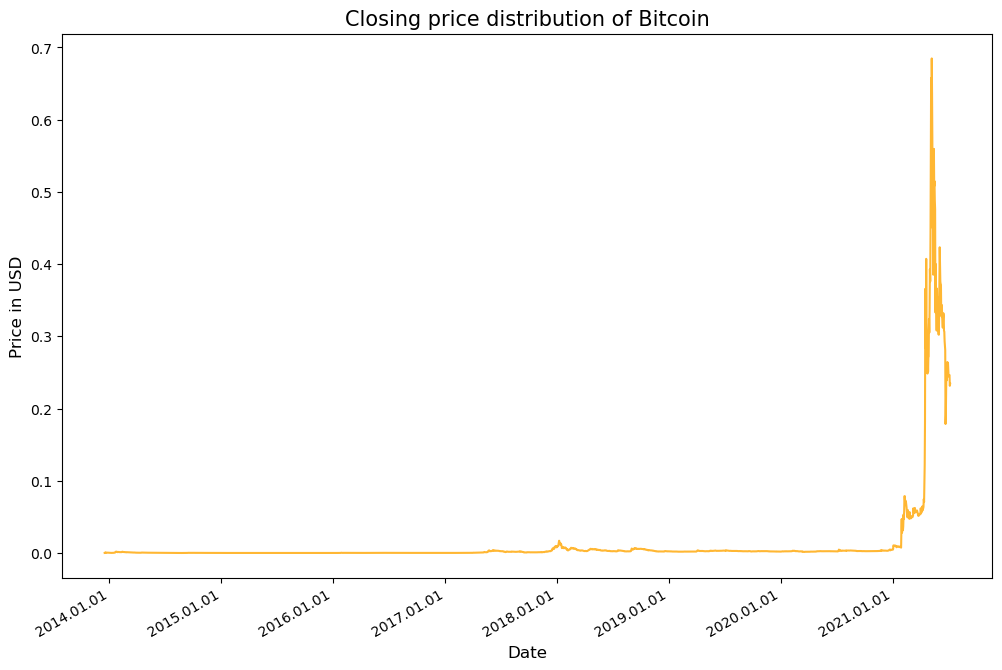

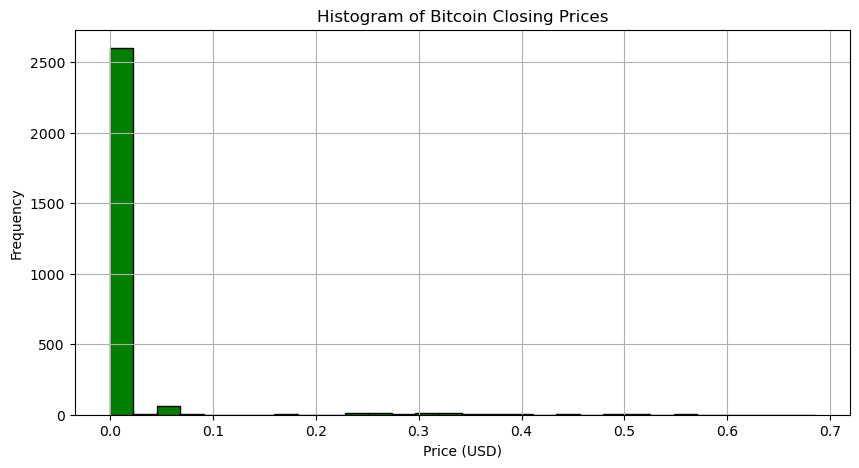

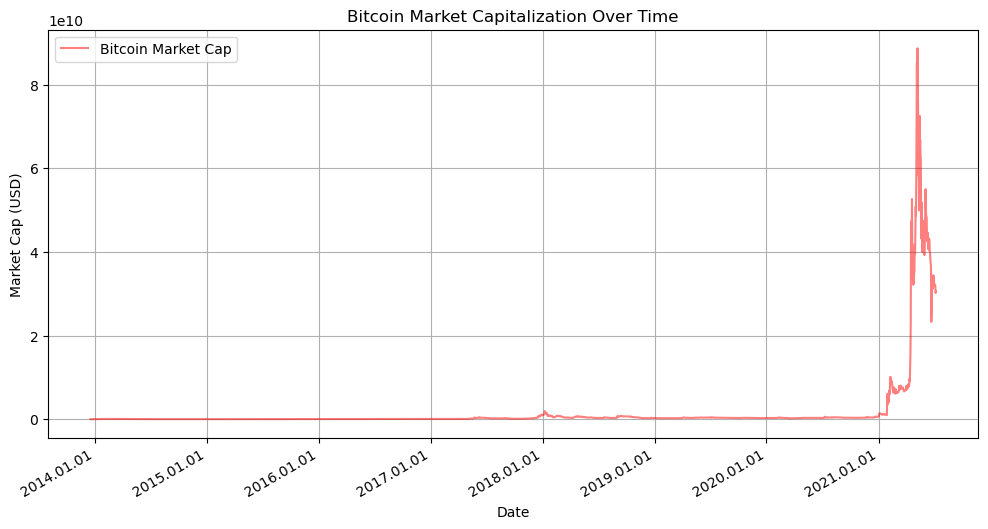

In [16]:
plots_for_crypto("./Resources/coin_Dogecoin.csv")

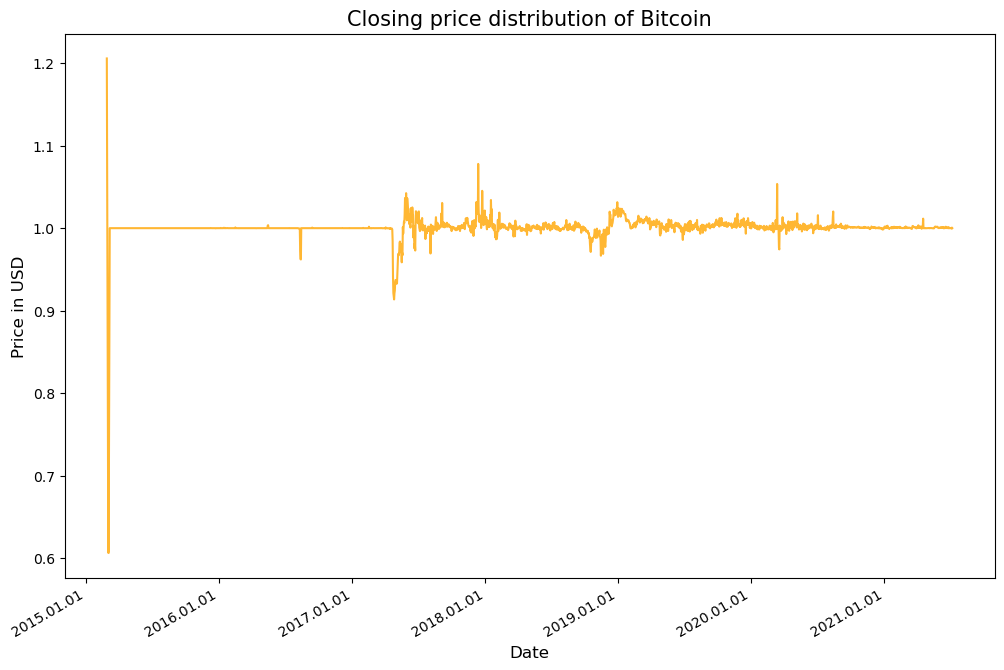

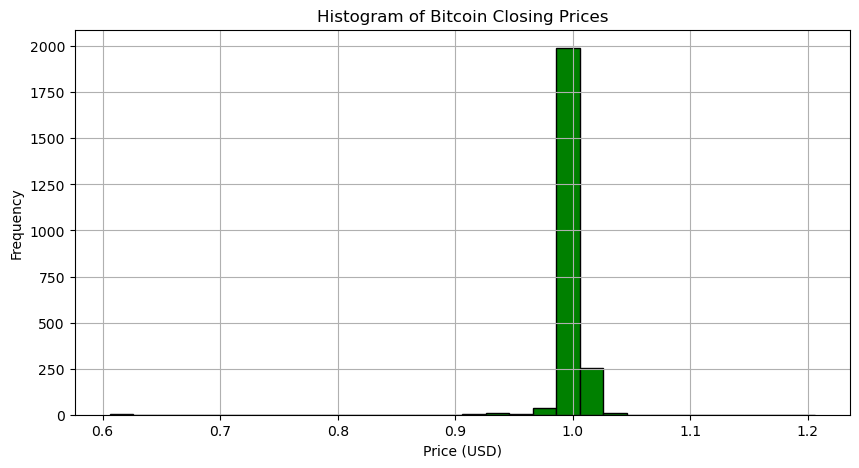

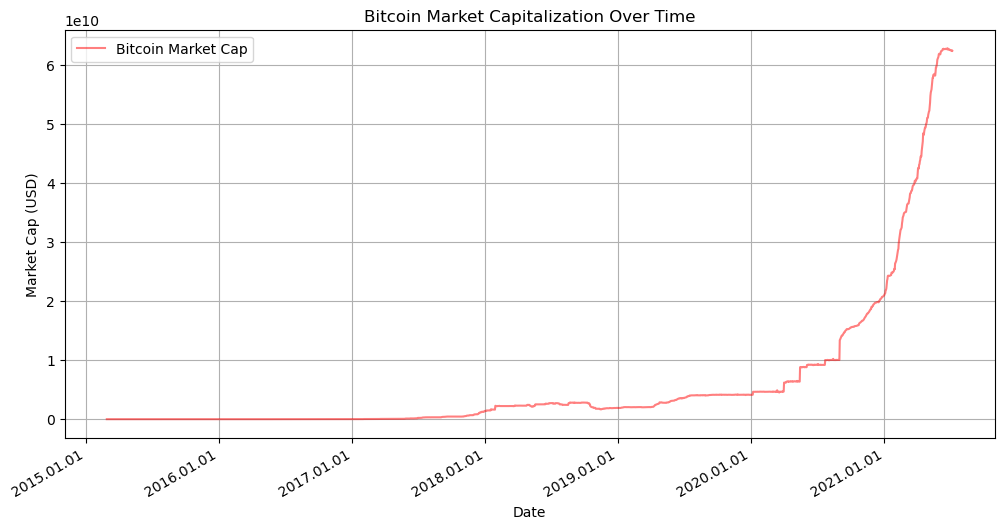

In [17]:
plots_for_crypto("./Resources/coin_Tether.csv")

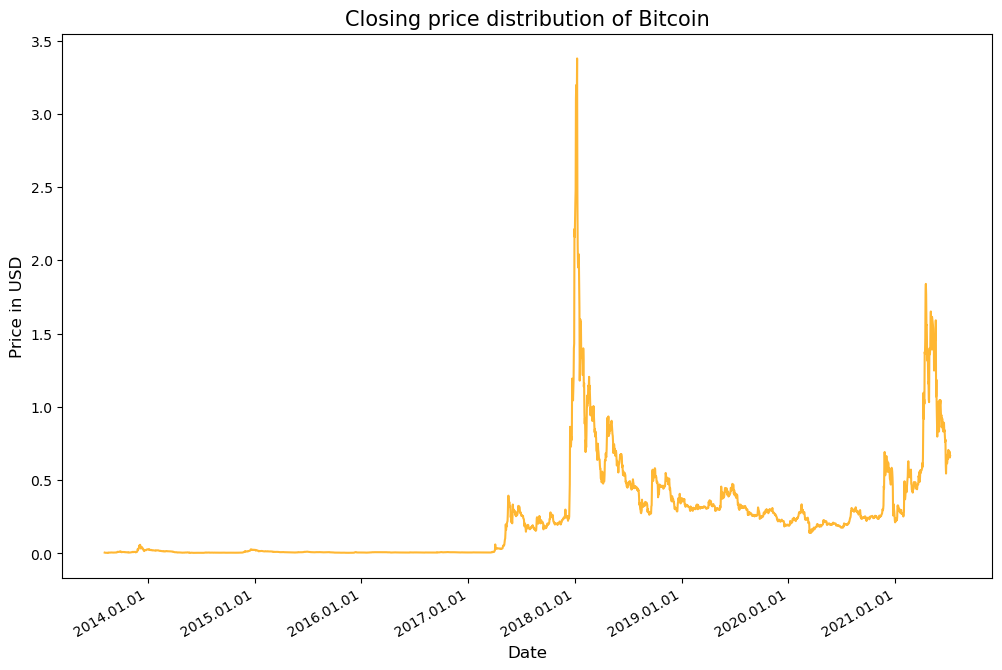

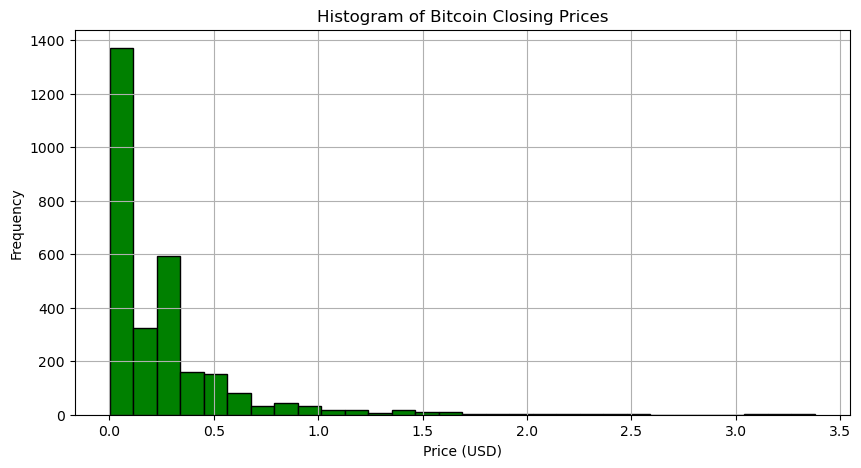

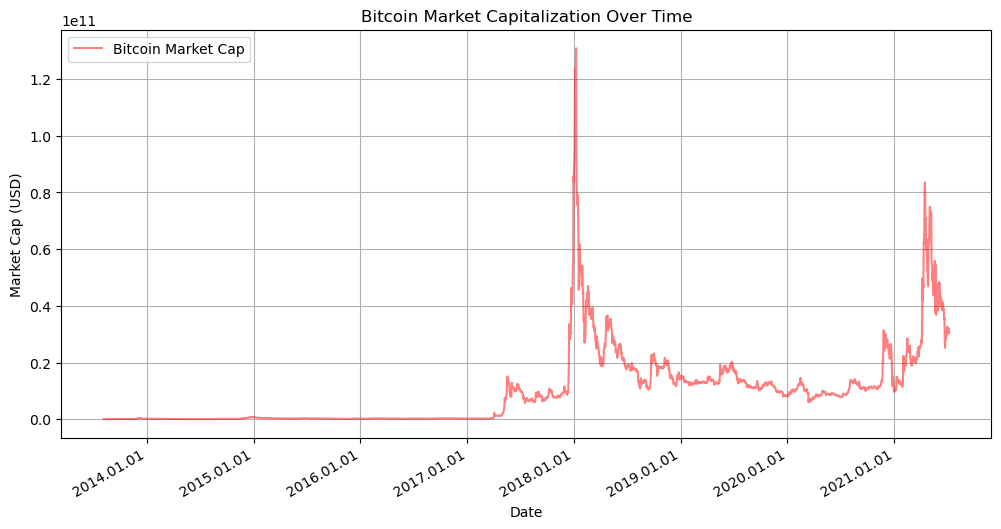

In [18]:
plots_for_crypto("./Resources/coin_XRP.csv")